# 今回は強化学習の1番有名なアルゴリズムのQ学習のコードを書いていきます．

今回の環境は強化学習[森村]のP113の環境を参考に実装します.環境の詳細はそちらで確認してください．


In [1]:
import numpy as np
S = 3
A = 2
#環境の定義
class Env:
    def __init__(self):
        self.S = S
        self.A = A
        self.p = np.zeros((self.S,self.A,self.S))
        self.reward = np.zeros((self.S,self.A))
        self.state = 0
        

    def reset(self):
        #報酬と遷移確率をそれぞれの行列に埋める．
        self.reward[0][0] = 1
        self.reward[0][1] = -1
        self.reward[1][0] = 1
        self.reward[1][1] = -1
        self.reward[2][0] = 1
        self.reward[2][1] = 12
        
        self.p[0][0][0] = 1
        self.p[0][1][0] = 0.5
        self.p[0][1][1] = 0.5
        self.p[1][0][0] = 1
        self.p[1][1][1] = 0.5
        self.p[1][1][2] = 0.5
        self.p[2][1][0] = 1
        self.p[2][0][1] = 1
        return self.state

    def act(self,action):
     
        
        reward = self.reward[self.state][action]
        #遷移確率の上で次の状態を決める
        max_index = np.where(self.p[self.state][action] == self.p[self.state][action].max())
        self.state = np.random.choice(max_index[0])

        return reward,self.state


### Q値の初期値は**0で初期化**してしまうと，行動を選ぶ際のargmaxのせいで性能があまりよくなくなってしまいます．

### 逆にargmaxを利用して，探索のような行動を取らせるためには，**初期値を大きく**取ればいいですね，今回の場合は100で取りました．

In [2]:
# Q = np.random.randn(S,A)
Q = np.ones((S,A)) * 100
# Q = np.zeros((S,A))
gamma = 0.9
def td_error(state,reward,next_state,action,alpha,p):
    delta = reward + gamma * max(Q[next_state]) - Q[state][action]
    Q[state][action] += alpha * delta

def choose_action(state,epsilon):
    if epsilon >= np.random.uniform():
        return np.random.randint(2)
    else:
        return np.argmax(Q[state])


In [3]:
from tqdm import tqdm
env = Env()
state = env.reset()
for t in tqdm(range(10000)):
    alpha_epsilon = 100/(t + 200)
    action = choose_action(state,alpha_epsilon)
    reward,next_state = env.act(action)
    
    td_error(state,reward,next_state,action,alpha_epsilon,env.p[state][action][next_state])
    state = next_state

100%|██████████| 10000/10000 [00:00<00:00, 22480.20it/s]


In [4]:
Q

array([[11.5053562 , 12.44632725],
       [13.90999102, 16.66323822],
       [21.50839579, 23.10513025]])

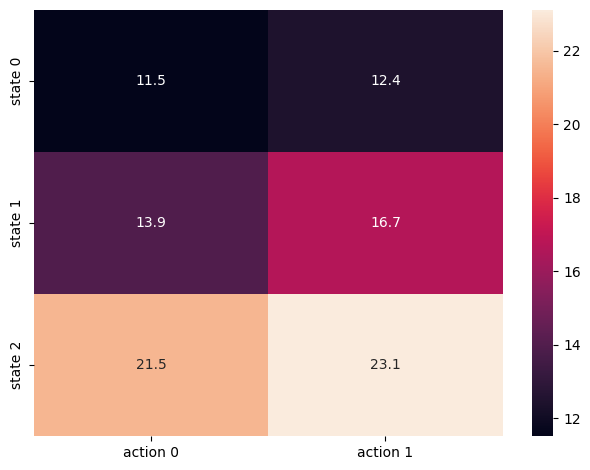

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel("action")
plt.ylabel("state")
sns.heatmap(Q,annot=True,fmt="1.1f",xticklabels=['action 0','action 1'],yticklabels=['state 0','state 1','state 2'])
plt.tight_layout()
plt.show()

##### 上のヒートマップを見ればわかるように状態0,1では短期的な視点で考えれば行動0の方が報酬が多いですが，行動１の方が価値が高いとなっているので，**長期的な視点での方策が成立**していることがわかりますね．